## PGM read

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def mypgmread(filename):
    
    with open(filename, 'rb') as f:
        
        # Dosyanın ilk iki baytınının "P5" olup olmadığını kontrol et
        magic_number = f.readline().decode('ascii').strip()
        assert magic_number == 'P5', 'Invalid PGM'

        
        while True:
            #Dosyadan bir satır oku, ASCII karakterlere çevir, başındaki ve sonundaki boşlukları temizle
            line = f.readline().decode('ascii').strip()
            if not line.startswith('#'):# Yorum satırlarını atla
                break

        # Genişlik, yükseklik ve maksimum değeri oku
        
        width, height = map(int, line.split()) #line adındaki stringi boşluk karakterlerine göre ayırır bu ayrılmış liste üzerinde int fonksiyonunu her bir elemana uygula
        maxval = int(f.readline().decode('ascii').strip())

        image_data = []#Görüntü verisini depolamak için liste oluştur
        
        for _ in range(height):
            row = []
            for _ in range(width):
                pixel_value = ord(f.read(1))#Dosyadan bir bayt oku ve ASCII değere dönüştür
                row.append(pixel_value)
            image_data.append(row)

        return image_data, width, height, maxval

## Figure 3.4

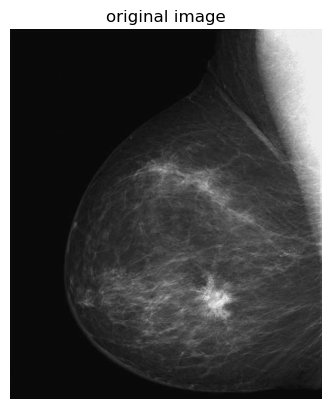

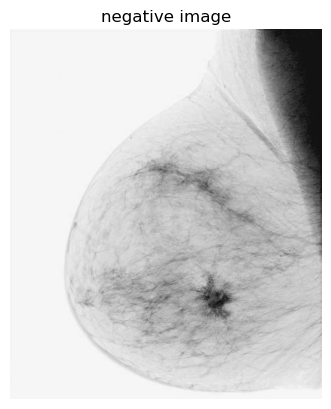

In [3]:
def myimage_negative(data):

    image_array = np.array(data, dtype=np.uint8)# numpy dizisine çevir

    negative=maxval-image_array

    return negative

image_data, width, height, maxval = mypgmread('Fig0304(a)(breast_digital_Xray).pgm')
plt.title("original image")
plt.imshow(image_data, cmap='gray')
plt.axis('off') 
plt.show()

neg=myimage_negative(image_data)
plt.title("negative image")
plt.imshow(neg, cmap='gray')
plt.axis('off') 
plt.show()

s = L - 1 - r ifadesi kullanılarak myimage_negative fonksiyonunda görüntünün negatifi elde edilmiştir. Dönüşüm her piksel değerine uygulanmış siyah kısımlar beyaz, beyaz kısımlar siyah olarak dönüştürülmüştür. Negatifi alınan görüntünün daha fazla ayrıntı verdiği düşünülmektedir.

## Figure 3.5

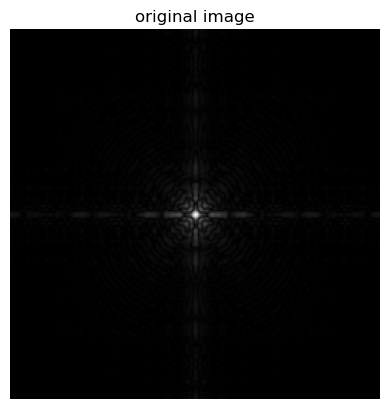

C:\Users\Merve\AppData\Local\Temp\ipykernel_10200\3570600621.py:6: RuntimeWarning: divide by zero encountered in log
  log=np.log(1+image_array)


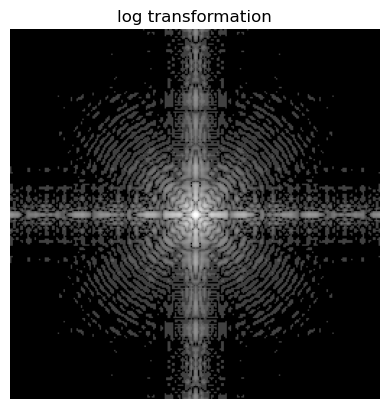

In [4]:
import math
def mylog_transform(data):
    maxval=255
    image_array = np.array(data, dtype=np.uint8)# numpy dizisine çevir
    
    log=np.log(1+image_array)
    return log
    
    
    
image_data, width, height, maxval = mypgmread('Fig0305(a)(DFT_no_log).pgm')
plt.title("original image")
plt.imshow(image_data, cmap='gray')
plt.axis('off') 
plt.show()

neg=mylog_transform(image_data)
plt.title("log transformation")
plt.imshow(neg, cmap='gray')
plt.axis('off') 
plt.show()

Logaritma transformunun girişteki değerleri daha geniş bir çıkış seviyesi aralığına dönüştürdüğü gözlemlenmiştir. Orjinal görüntüdeki beyaz kısımlar transform ile daha geniş bir aralığa yayıldı. Görüntünün parlaklığı arttı.

## Figure 3.8

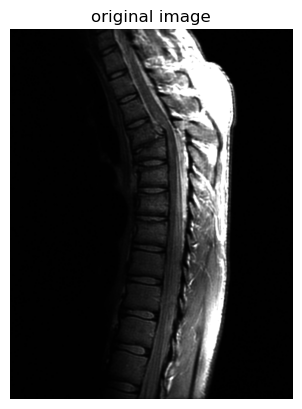

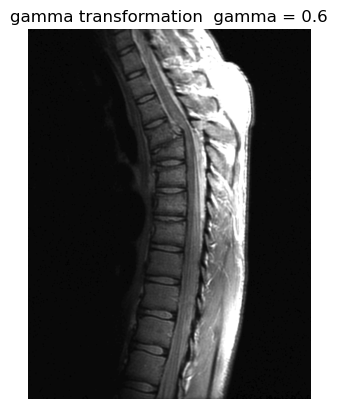

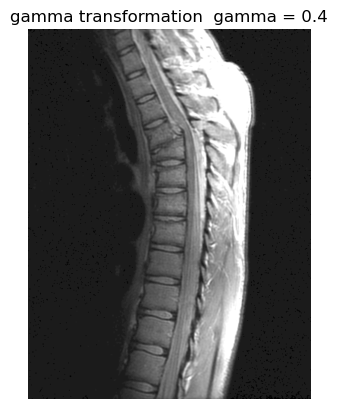

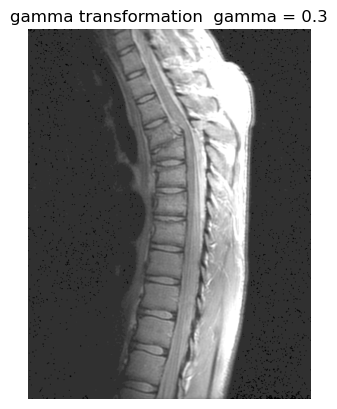

In [5]:
def my_gammatransform(data,gamma):
    image_array = np.array(data, dtype=np.uint8)# numpy dizisine çevir
    
    transform=pow(image_array,gamma)
    return transform
    
image_data, width, height, maxval = mypgmread('Fig0308(a)(fractured_spine).pgm')
plt.title("original image")
plt.imshow(image_data, cmap='gray')
plt.axis('off') 
plt.show()

neg=my_gammatransform(image_data,0.6)
plt.title("gamma transformation  gamma = 0.6")
plt.imshow(neg, cmap='gray')
plt.axis('off') 
plt.show()

neg=my_gammatransform(image_data,0.4)
plt.title("gamma transformation  gamma = 0.4")
plt.imshow(neg, cmap='gray')
plt.axis('off') 
plt.show()

neg=my_gammatransform(image_data,0.3)
plt.title("gamma transformation  gamma = 0.3")
plt.imshow(neg, cmap='gray')
plt.axis('off') 
plt.show()

gamma değeri arttıkça görüntülerin aydınlığı artmıştır. Gama 0,6'dan 0,4'e düştükçe daha fazla ayrıntının görünür hale geldiğini görüyoruz. Gamanın 0,3'e daha da düşürülmesi arka planda biraz daha fazla ayrıntıyı artırdı,
ancak görüntünün kaybolmaya başladığı noktaya kadar kontrastı azaltmaya başladı
ayrıca arka plan hafif soluk bir görünüme sahip oldu.

## Figure 3.33

In [37]:
def averageMaskFilter(data,size,width,height):
   
    data = np.array(data,dtype=np.uint8)
    
    padding = size // 2  # Ekstra sütun/satır sayısı, filtre boyutunun yarısı kadar

    #görüntü kenarındaki pikselleri korumak için 
    w = np.zeros((height + 2*padding, width + 2*padding))# w-> görüntü verisini çerçeveler filtre size ına göre 
    
    for i in range(0,height):    
        for j in range(0,width):
            w[i + padding][j + padding] = data[i][j]
            

    filtered = np.zeros((height,width))
    for i in range(0,height):
        for j in range(0,width):
            filtered[i][j] = int(np.mean(w[i:size+i,j:size+j]))#filtrelenmiş görüntü verisini tutar
            
    return filtered

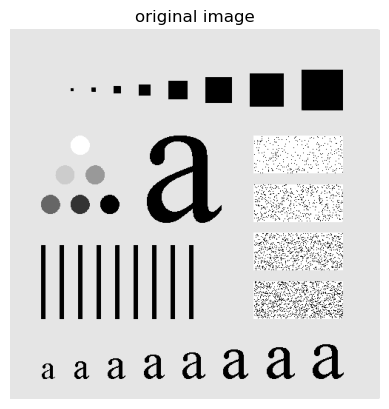

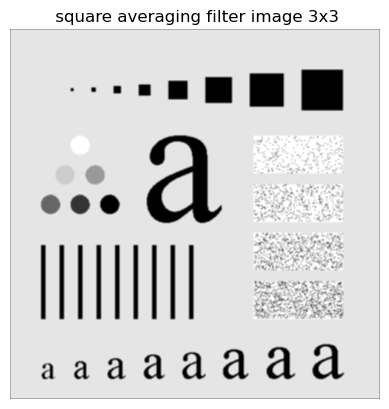

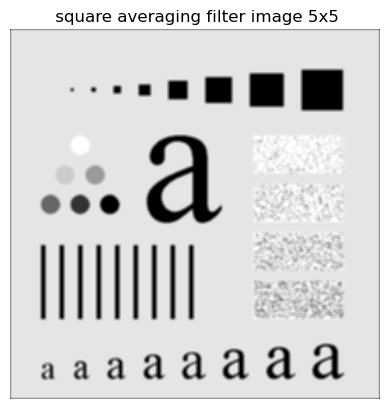

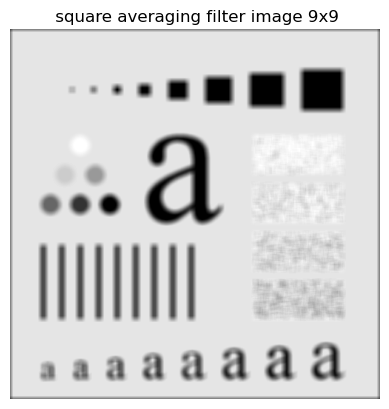

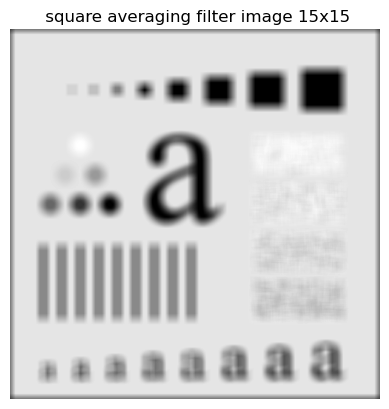

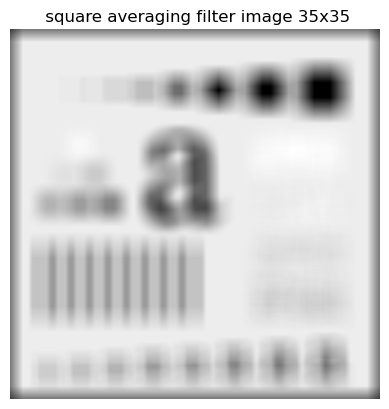

In [38]:
image_data, width, height, maxval = mypgmread('Fig0333(a)(test_pattern_blurring_orig).pgm')

plt.title("original image")
plt.imshow(image_data, cmap='gray')
plt.axis('off') 
plt.show()

fig=averageMaskFilter(image_data,3,width,height)
plt.title(" square averaging filter image 3x3")
plt.imshow(fig, cmap='gray')
plt.axis('off') 
plt.show()

fig=averageMaskFilter(image_data,5,width,height)
plt.title(" square averaging filter image 5x5")
plt.imshow(fig, cmap='gray')
plt.axis('off') 
plt.show()

fig=averageMaskFilter(image_data,9,width,height)
plt.title(" square averaging filter image 9x9")
plt.imshow(fig, cmap='gray')
plt.axis('off') 
plt.show()

fig=averageMaskFilter(image_data,15,width,height)
plt.title(" square averaging filter image 15x15")
plt.imshow(fig, cmap='gray')
plt.axis('off') 
plt.show()

fig=averageMaskFilter(image_data,35,width,height)
plt.title(" square averaging filter image 35x35")
plt.imshow(fig, cmap='gray')
plt.axis('off') 
plt.show()

Görüntüler incelendiğinde filtre boyutu arttıkça görüntünün bulanıklaştığı gözlemlenmiştir. Örneğin filtre boyutu 35x35 olduğunda kenarlarda belirgin siyah bir görüntü oluşmuştur. Orijinal görüntünün kenarları 0'larla doldurulmuştu, filtre boyutunun çok büyük olması sebebiyle siyahlık yayıldı ve görüntü kötü bir hale geldi. 3x3 ve 5x5 filtre uygulanan görüntüler ise gürültünün azaltıldığı ve kenarların düzgün olduğu görüntülerdir. 9x9 filtreden sonra bulanıklaşma çok net hale gelmiş ve görüntünün ayrıntıları kaybedilmiştir.

## Figure 3.35

In [39]:
def my_medianfilter(data,size,width,height):
    data = np.array(data,dtype=np.uint8)
    
    padding = size // 2  # Ekstra sütun/satır sayısı, filtre boyutunun yarısı kadar

    #görüntü kenarındaki pikselleri korumak için 
    w = np.zeros((height + 2*padding, width + 2*padding))# w-> görüntü verisini çerçeveler filtre size ına göre 
    
    for i in range(0,height):    
        for j in range(0,width):
            w[i + padding][j + padding] = data[i][j]
            

    filtered = np.zeros((height,width))
    for i in range(0,height):
        for j in range(0,width):
            filtered[i][j] = int(np.median(w[i:size+i,j:size+j]))#filtrelenmiş görüntü verisini tutar
            
    return filtered


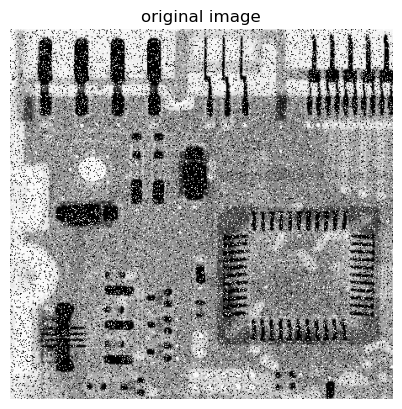

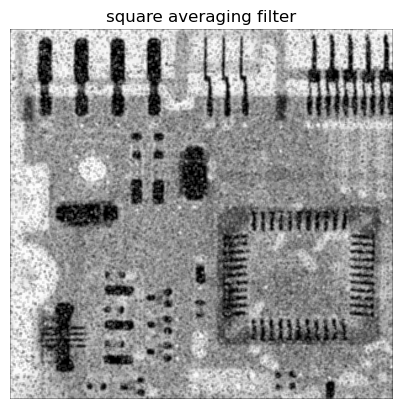

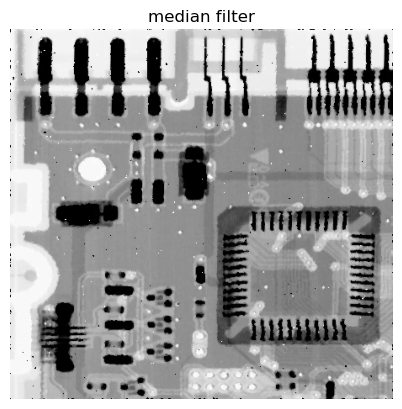

In [40]:
image_data, width, height, maxval = mypgmread('Fig0335(a)(ckt_board_saltpep_prob_pt05).pgm')

plt.title("original image")
plt.imshow(image_data, cmap='gray')
plt.axis('off')
plt.show()

fig=averageMaskFilter(image_data,3,width,height)
plt.title("square averaging filter")
plt.imshow(fig, cmap='gray')
plt.axis('off')
plt.show()

median = my_medianfilter(image_data,3,width,height)
plt.title("median filter")
plt.imshow(median, cmap='gray')
plt.axis('off')
plt.show()

İki filtre de her pikselin değerini hesaplamak için yakınındaki komşularına bakıyor. Ancak median filtresinde piksel değeri komşu piksel değerlerinin ortalaması ile değiştirmek yerine (mean filtresi), komşu pikselleri sıralayıp sıranın ortasındaki değeri alır. Median filtresi, mean filtresi gibi görüntüdeki gürültüyü azalttı ve görüntüyü yumuşattı. Ancak görüntü üzerindeki detayların kaybolmaması konusunda median filtre, mean filtresinden çok daha iyi sonuç verdi.